In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
mcAccs = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/mcAccuracies.csv')

In [21]:
mcAccs.loc[mcAccs["trainOrTest"]=="te"].replace({"trainOrTest":{"te":"Test Accuracy"}})
mcAccs.loc[mcAccs["trainOrTest"]=="tr"]["accuracy"][0]
mcAccs

,mcSampleNumber,accuracy,trainOrTest
0,1,0.734590,tr
1,1,0.452808,te
2,3,0.495818,te
3,5,0.634409,te
4,7,0.652330,te
...,...,...,...
146,21,0.694146,te
147,23,0.657109,te
148,25,0.686977,te
149,27,0.651135,te


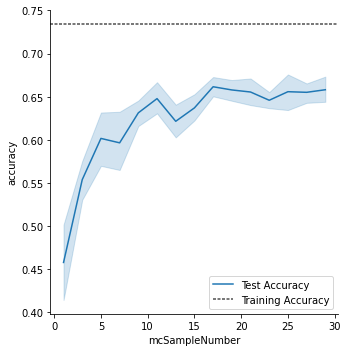

In [34]:
p = sns.relplot(data = mcAccs.loc[mcAccs["trainOrTest"]=="te"].replace({"trainOrTest":{"te":"Test Accuracy"}}), 
                x="mcSampleNumber", y="accuracy", kind="line", hue="trainOrTest")
p.map(plt.axhline, y=mcAccs.loc[mcAccs["trainOrTest"]=="tr"]["accuracy"][0], color=".3", dashes=(2, 1), zorder=0, label="Training Accuracy");
p._legend.remove()
plt.legend(loc = "lower right");

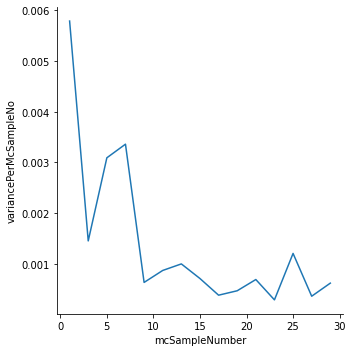

In [48]:
p = sns.relplot(
    data = mcAccs.loc[mcAccs["trainOrTest"]=="te"].groupby("mcSampleNumber").var().rename(columns={"accuracy":"variancePerMcSampleNo"}), 
    x="mcSampleNumber", y="variancePerMcSampleNo", kind="line",)


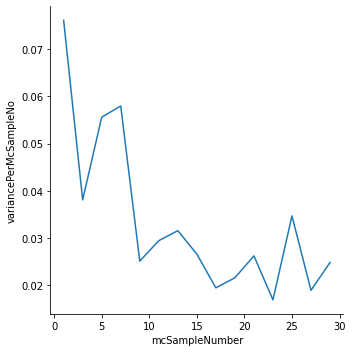

In [50]:
p = sns.relplot(
    data = mcAccs.loc[mcAccs["trainOrTest"]=="te"].groupby("mcSampleNumber").std().rename(columns={"accuracy":"variancePerMcSampleNo"}), 
    x="mcSampleNumber", y="variancePerMcSampleNo", kind="line",)


In [45]:
mcAccs.loc[mcAccs["trainOrTest"]=="te"].groupby("mcSampleNumber").std().rename(columns={"accuracy":"variancePerMcSampleNo"})

,variancePerMcSampleNo
mcSampleNumber,
1,0.076077
3,0.038066
5,0.055579
7,0.057948
9,0.025094
11,0.029426
13,0.031544
15,0.026583
17,0.019437
